<a href="https://colab.research.google.com/github/MarcosVeniciu/Xception_CNN_Plant-Pathology-2020/blob/main/Xception_CNN_Plant_Pathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do DataSet [5]

## Configuração do Keggle e Download do DataSet [1]

In [1]:
# Intalação do keggle

! pip install -q kaggle

In [ ]:
# Lê o arquivo Kaggle.json

from google.colab import files
files.upload()

In [3]:
# Cria uma pasta chamada Keggle e copia o arquivo Json para ela.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# Altera as permisções para o arquivo keggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Verifica uma lista de dataset do keggle. Se a lista for exibida, esntão ta tudo certo. (opcional)
! kaggle datasets list

In [7]:
# Download do DataSet que eu quero: https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/data
# É preciso aceitar as regras na aba de Rules para poder fazer o dosnloas do dataset

! kaggle competitions download -c plant-pathology-2020-fgvc7

100% 777M/779M [00:06<00:00, 136MB/s]
100% 779M/779M [00:06<00:00, 117MB/s]


In [ ]:
# Descompacta o arquivo plant-pathology-2020-fgvc7

! unzip plant-pathology-2020-fgvc7.zip

As imagens estão todas na mesma pasta. \
As imagens de testes vão de Test_0 ate Test_1820. \
As imagens de treino vão de Train_0 ate Train_1820.

## Preparação do DataSet

In [9]:
# healthy = 1 planta saldavel, healthy = 0 alguma doença: multiple_diseases, rust ou scab
import pandas as pd

dataset = pd.read_csv("/content/train.csv")
dataset

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [ ]:
# Cria os diretórios para as imagens

!mkdir Imagens_plantas
!mkdir Imagens_plantas/healthy
!mkdir Imagens_plantas/multiple_diseases
!mkdir Imagens_plantas/rust
!mkdir Imagens_plantas/scab


In [ ]:
# move as imagens de plantas saldaveis e doentes para a sua respectiva pasta em Imagens_plantas
import os
import shutil

for i in range (1821): #0 ate 1820
  caminho_origem =  "/content/images/Train_" + str(i) + ".jpg"

  if(dataset['healthy'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/healthy")
  if(dataset['multiple_diseases'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/multiple_diseases")
  if(dataset['rust'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/rust")
  if(dataset['scab'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/scab")

In [ ]:
# Contar o numero de imagens nas pastas
print("PLantas saudaveis: "+ str(len(os.listdir("/content/Imagens_plantas/healthy"))))
print("PLantas com multiple diseases: "+ str(len(os.listdir("/content/Imagens_plantas/multiple_diseases"))))
print("PLantas com rust: "+ str(len(os.listdir("/content/Imagens_plantas/rust"))))
print("PLantas com scab: "+ str(len(os.listdir("/content/Imagens_plantas/scab"))))

### Data Augmentation

#### Funções

In [ ]:
from numpy import asarray
from PIL import Image 

def imagem_to_array(imagem_local):
  img = Image.open(imagem_local) 
  return asarray(img)

In [ ]:
def array_to_imagem(imagem_array, novo_nome):
  data = tf.keras.preprocessing.image.array_to_img(imagem_array, data_format=None,scale=False,dtype=None)
  data.save(novo_nome)

In [ ]:
# Transformaçoes disponiveis

def rotacao90(image):
  return tf.image.rot90(image, 1)

def rotacao180(image):
  return tf.image.rot90(image, 2)

def rotacao270(image):
  return tf.image.rot90(image, 3)

def saturation(image):
  return tf.image.adjust_saturation(image, 3)

def flip_up_down (image):
  seed = (2, 3)
  return tf.image.stateless_random_flip_up_down(image, seed)

def rotacao90_flip_left_right(image):
  imagem = tf.image.rot90(image, 1)
  return tf.image.flip_left_right(imagem)

def rotacao90_flip_up_down(image):
  seed = (2, 3)
  imagem = tf.image.rot90(image, 1)
  return tf.image.stateless_random_flip_up_down(imagem, seed)


In [ ]:
# Transforma e salva as novas imagens

# Transformação 1
def transformacao_1 (imagem, local, nome):
  transformada = rotacao90(imagem)
  novo_nome = "rotacao90_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 2
def transformacao_2 (imagem, local, nome):
  transformada = rotacao180(imagem)
  novo_nome = "rotacao180_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 3
def transformacao_3 (imagem, local, nome):
  transformada = rotacao270(imagem)
  novo_nome = "rotacao270_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 4
def transformacao_4 (imagem, local, nome):
  transformada = rotacao90_flip_up_down(imagem)
  novo_nome = "rotacao90_flip_up_down_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 5
def transformacao_5 (imagem, local, nome):
  transformada = flip_up_down(imagem)
  novo_nome =  "flip_up_down_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 6
def transformacao_6 (imagem, local, nome):
  transformada = rotacao90_flip_left_right(imagem)
  novo_nome = "rotacao90_flip_left_right_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)

# Transformação 7
def transformacao_7 (imagem, local, nome):
  transformada = saturation(imagem)
  novo_nome = "saturation_" + nome
  dir = local + novo_nome
  array_to_imagem(transformada, dir)


In [ ]:
def DataAugmentation (local, total):
  lista = os.listdir(local) #lisa com o nome das imagens que estão na pasta

  indices_sorteados = random.sample(range(len(lista)), len(lista)) # sorteia as imagens que seram tranformadas

  contagem = len(lista)# definida uma unica vez

  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_1 (imagem, local, nome) # rotacao 90

    contagem = contagem +1
    indice = indice +1

  
  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_2 (imagem, local, nome) # rotacao 180

    contagem = contagem +1
    indice = indice +1

  
  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_3 (imagem, local, nome) # rotacao 270

    contagem = contagem +1
    indice = indice +1


  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_4 (imagem, local, nome) # rotacao 90 + flip up down

    contagem = contagem +1
    indice = indice +1


  
  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_5 (imagem, local, nome) # flip up down

    contagem = contagem +1
    indice = indice +1


  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_6 (imagem, local, nome) # rotacao 90 + flip left right

    contagem = contagem +1
    indice = indice +1


  indice = 0 # reseta a cada nova transformação
  while ( (contagem < total) and (indice < len(indices_sorteados)) ):
    i = indices_sorteados[indice]
    imagem_local = local +lista[i]
    imagem = imagem_to_array(imagem_local) # converte a imagem para um array
    nome = lista[i] 

    transformacao_7 (imagem, local, nome) # saturation

    contagem = contagem +1
    indice = indice +1

In [ ]:
# Contar o numero de imagens nas pastas

def Contar_Imagens(locais):
  for local in locais:
    print(local)
    print(len(os.listdir(local)))


#### Aplicando o aumanto de imagens

In [ ]:
# Aplicas varias transformações em todas as imagens presentes nas classes.
total = 3210 #Total de imagens por classe

locais = ["/content/Imagens_plantas/healthy/", "/content/Imagens_plantas/multiple_diseases/",
          "/content/Imagens_plantas/rust/","/content/Imagens_plantas/scab/"]
for local in locais:# Percorre todos as classes
  # Realiza o aumento de dados
  DataAugmentation (local, total) # Realiza o aumento de dados na classe

Contar_Imagens(locais) # Conta o numero de imagens apos o aumento de dados 

# Xception network [2]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Pré-processamento das imagens de treino e validação

In [ ]:
image_size = (180, 180)
batch_size = 32

In [ ]:
diretorio_imagens = "/content/Imagens_plantas"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio_imagens,
    validation_split=0.2, # 20% das imagens serão para validação e os 80% restantes seram para o treino
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio_imagens,
    validation_split=0.2, # 20% das imagens serão para validação e os 80% restantes seram para o treino
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1821 files belonging to 2 classes.
Using 1457 files for training.
Found 1821 files belonging to 2 classes.
Using 364 files for validation.


In [ ]:
# Verifica o nome da classe (diretorio das imagens) e o indice dela
print(train_ds.class_names)
print(val_ds.class_names)

['doentes', 'saudaveis']
['doentes', 'saudaveis']


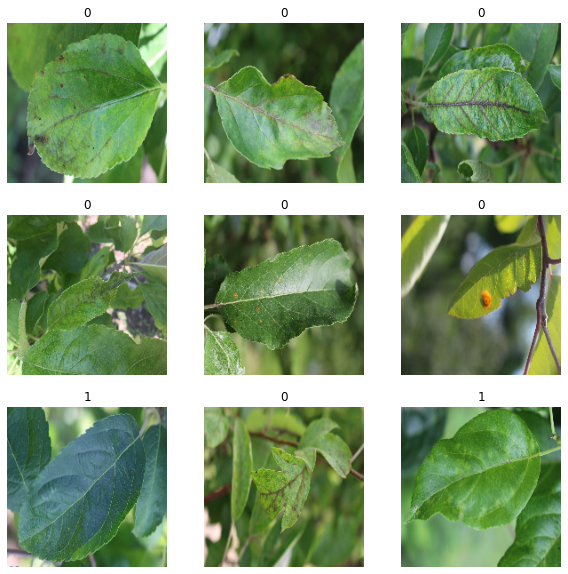

In [ ]:
# Visualizar algumas das imagens. Onde o numero acima da imagen indica o indice da classe. 1 para saudaveis e 0 para doentes.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
# Aplicando algumas transformações nas imagens, para aumentar o dataset

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

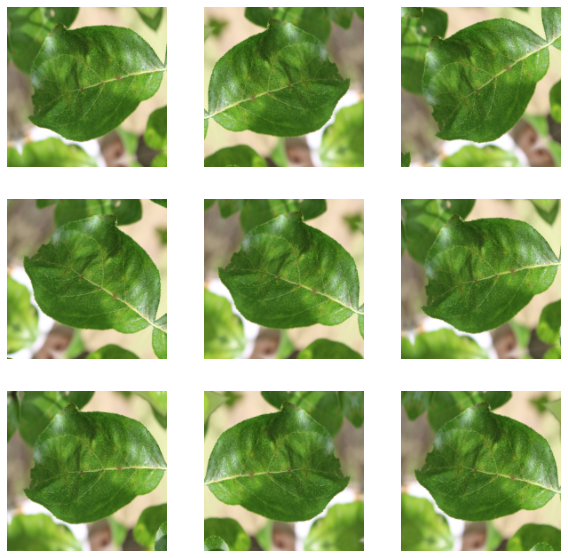

In [ ]:
# Exibir alguns exemplos de transformações

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# Configurando o dataset
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Construindo o Modelo

In [ ]:
def xception(input_shape, num_classes, dropout):
  base_model = keras.applications.Xception(
    weights=None,  # Os pesos serão inicializados aleatóriamente.
    input_shape=input_shape,
    include_top=False, # Não vai incluir a camada de classificação
  )  

  # freeze the base_model
  base_model.trainable = True # Sendo True vai permitir que os pesos sejam atualizados durante o treinamento

  # Create new model on top
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)  # Apply random data augmentation

  # Pre-trained Xception weights requires that input be scaled
  # from (0, 255) to a range of (-1., +1.), the rescaling layer
  # outputs: `(inputs * scale) + offset`
  scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
  x = scale_layer(x)
  
  # The base model contains batchnorm layers. We want to keep them in inference mode
  # when we unfreeze the base model for fine-tuning, so we make sure that the
  # base_model is running in inference mode here.
  x = base_model(x, training=True)
  x = keras.layers.GlobalAveragePooling2D()(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  x = keras.layers.Dropout(dropout, name="dropout_2")(x) # Regularize with dropout
  x = keras.layers.Dense(1024, activation=activation)(x)
  x = keras.layers.Dense(512, activation=activation)(x)
  outputs = keras.layers.Dense(units, activation=activation)(x)
  return keras.Model(inputs, outputs)

## Treinando o Modelo

In [ ]:
espera = 5 
espera_2 = 8
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                              mode = "min",
                                              patience = espera,
                                              factor=0.2,# 20% da taxa atual, reduz em 80%. nova lr = lr * fator
                                              min_lr=0.0000001, # reduz até 1e-7
                                              verbose = 1)
earlystopping =  keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                               mode ="min", 
                                               patience = espera_2, 
                                               restore_best_weights = True)

In [ ]:
epochs = 100
dropout = 0.5
num_classes = 4

model = xception(input_shape = image_size + (3,), num_classes = num_classes, dropout = dropout)

loss_function = "SparseCategoricalCrossentropy" if num_classes >= 3 else "binary_crossentropy"
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss = loss_function,
    metrics=["accuracy"],
)

In [ ]:
historico = model.fit(
    train_ds, epochs=epochs, callbacks=[reduce_lr, earlystopping], validation_data=val_ds,
)

In [ ]:
def diferenca(historico):
  accuracy = historico.history['accuracy'] 
  val_accuracy = historico.history['val_accuracy']
  vetor_diferenca = []

  for i in range(len(accuracy)):
    diferenca = abs(accuracy[i] - val_accuracy[i])
    vetor_diferenca.append(diferenca)

  return vetor_diferenca

historicos = [historico]
nome_modelo = "Xception"
for i in range(len(historicos)):

  historico = historicos[i]

  plt.subplots(figsize=(25, 5)) 
  # Grafico 1: Loss
  plt.subplot(1,3,1)
  plt.title(nome_modelo + ' V' + str(i) + ': Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.plot(historico.history['loss'], label='Train Loss', color = 'blue')
  plt.plot(historico.history['val_loss'], label='Val Loss', color = 'red')
  plt.legend()

  # Grafico 2: Acurácia
  plt.subplot(1,3,2)
  plt.title(nome_modelo + ' V' + str(i) + ': Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.plot(historico.history['accuracy'],  label='Train Accuracy' , color = 'blue')
  plt.plot(historico.history['val_accuracy'],label = 'Val Accuracy', color = 'red')
  plt.legend()

  # Grafico 3: Diferença de Acurácia
  vetor_diferenca = diferenca(historico)

  plt.subplot(1,3,3)
  plt.title(nome_modelo + " V"+ str(i) + ": Variação da Acurácia")
  plt.xlabel("Epocas")
  plt.ylabel("Pontos Percentuais")
  plt.grid()
  plt.plot(vetor_diferenca, color = 'red', label = 'abs(Train Acuracy - Val Acuracy)')
  plt.legend()

  plt.show()

In [ ]:
#Salvando o modelo
local_modelo = "/content/Xception.h5"
model.save(local_modelo)

## Predição

In [ ]:
y_true = []
y_pred = []
for image_batch, labels_batch in val_ds:
  y_pred_itera = model.predict(image_batch)
  y_true_intera = labels_batch.numpy()
  for i in range(len(y_true_intera)):
    y_true.append(y_true_intera[i])  
    y_pred.append(y_pred_itera[i][0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize  = (10, 7))
lw = 2
plt.plot(fpr,tpr, color="red",lw=lw,label="{Xception}  (Área AUC = {0:0.8f})".format(roc_auc[i]),)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic - ROC")
plt.legend(loc="lower right")
plt.show()

# Extras

In [ ]:
# Apagar diretorio com arquivos

import shutil
pasta = "/content/Imagens_plantas"
shutil.rmtree(pasta, ignore_errors=True)

In [ ]:
# Contar o numero de imagens de cada classe

saudavel = 0
multiplas = 0
rust = 0
scab = 0

for i in range(1820):
  if(dataset['healthy'][i] == 1):
    saudavel = saudavel +1
  if(dataset['multiple_diseases'][i] == 1):
    multiplas = multiplas +1
  if(dataset['rust'][i] == 1):
    rust = rust +1
  if(dataset['scab'][i] == 1):
    scab = scab +1

print("saudavei: " + str(saudavel))
print("scab: " + str(scab))
print("multiplas: " + str(multiplas))
print("rust: " + str(rust))

saudavei: 516
scab: 591
multiplas: 91
rust: 622


In [ ]:
# DataSet Balanceado 
# move as imagens de plantas saldaveis e doentes para a sua respectiva pasta em Imagens_plantas
import os
import shutil

rust = 0
scab = 0

for i in range (1821): #0 ate 1820
  caminho_origem =  "/content/images/Train_" + str(i) + ".jpg"

  if(dataset['healthy'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/saudaveis")

  if(dataset['multiple_diseases'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/doentes")
  
  if(dataset['rust'][i] == 1 and rust <= 212):
    shutil.move(caminho_origem, "/content/Imagens_plantas/doentes")
    rust = rust+1
  
  if(dataset['scab'][i] == 1 and scab <= 212):
    shutil.move(caminho_origem, "/content/Imagens_plantas/doentes")
    scab = scab+1

In [ ]:
# Data set Multiclasse
import os
import shutil


# Cria as pastas
!mkdir Imagens_plantas
!mkdir /content/Imagens_plantas/saudaveis
!mkdir /content/Imagens_plantas/multiple_diseases
!mkdir /content/Imagens_plantas/rust
!mkdir /content/Imagens_plantas/scab


rust = 0
scab = 0

for i in range (1821): #0 ate 1820
  caminho_origem =  "/content/images/Train_" + str(i) + ".jpg"

  if(dataset['healthy'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/saudaveis")

  if(dataset['multiple_diseases'][i] == 1):
    shutil.move(caminho_origem, "/content/Imagens_plantas/multiple_diseases")
  
  if(dataset['rust'][i] == 1 and rust <= 212):
    shutil.move(caminho_origem, "/content/Imagens_plantas/rust")
    rust = rust+1
  
  if(dataset['scab'][i] == 1 and scab <= 212):
    shutil.move(caminho_origem, "/content/Imagens_plantas/scab")
    scab = scab+1


# Contar o numero de imagens nas pastas
# Treino
!echo DataSet Folhas Saldaveis
!ls /content/Imagens_plantas/saudaveis/*.jpg | wc | awk '{print $1}' 
!echo DataSet Folhas multiple_diseases
!ls /content/Imagens_plantas/multiple_diseases/*.jpg | wc | awk '{print $1}'
!echo DataSet Folhas rust
!ls /content/Imagens_plantas/rust/*.jpg | wc | awk '{print $1}'
!echo DataSet Folhas scab
!ls /content/Imagens_plantas/scab/*.jpg | wc | awk '{print $1}'


# Testes
!echo Testes Folhas
!ls /content/images/*.jpg | wc | awk '{print $1}'

DataSet Folhas Saldaveis
516
DataSet Folhas multiple_diseases
91
DataSet Folhas rust
213
DataSet Folhas scab
213
Testes Folhas
2609


# Referências

[1] Baixar dados do Keggle. [video] https://www.youtube.com/watch?v=57N1g8k2Hwc [Site] https://www.kaggle.com/general/74235 \

[2] 10/06 - Modelo de rede para cassificar imagens, que foi usado de exemplo na aulas. \
Colab: https://colab.research.google.com/drive/1MrVHG5B0xJB83G4hz8fSfgBCn7PwHAoh?usp=sharing#scrollTo=PfojoMdo5s8H  \

[3] Explicação da rede Xception: https://maelfabien-github-io.translate.goog/deeplearning/xception/?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=sc \

[4] Curva de aprendizado https://jobu.com.br/2021/07/15/tutorial-do-tensorflow-2/ \

[5] site do DataSet https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/overview \

[6] 23/06 - Modelo Xception pre-treinada: https://keras.io/guides/transfer_learning/#do-a-round-of-finetuning-of-the-entire-model
